In [2]:
import numpy as np # imports numpy libray as np
from sklearn.cluster import KMeans # imports KMeans class from sklearn.cluster
from sklearn.datasets import make_blobs # imports make_blobs from sklear.datasets

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]]) # creates an array in numpy called blob_centers
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) # creates an array named blob_std with std deviations
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7) # creates isotropic Gaussian blob for clustering using make_blobs

k = 5 # assigns 5 to variable k, creates 5 clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # creates a kMeans objects with parameters
y_pred = kmeans.fit_predict(X) # fits kMeans model to data x and predicts cluster labels

In [3]:
y_pred is kmeans.labels_ # makes sure that the fit_predict is correctly assigned labels

True

In [4]:
kmeans.inertia_ # calculates the inertia of the kMeans object, inertia = sum of squared distance of samples to closest cluster center

219.42800073647606

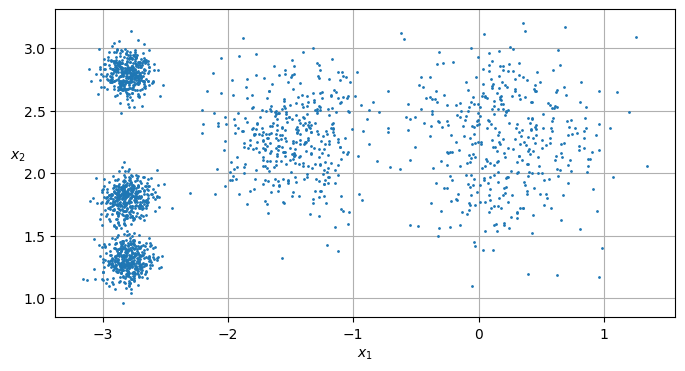

In [5]:
import matplotlib.pyplot as plt # imports matploblib library and calls it plt

def plot_clusters(X, y=None): # defines function called plot_clusters and takes points x and y as input
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1) # creates a scatter plot of the data points with with color
    plt.xlabel("$x_1$") # labels the x-axis
    plt.ylabel("$x_2$", rotation=0) # labels y-axis

plt.figure(figsize=(8, 4)) # creates a figure with specizied size
plot_clusters(X) # calls plot_clusters to plot data points
plt.gca().set_axisbelow(True) # sets grid lines behind data
plt.grid() # adds grid line to plot
plt.show() # shows plot

In [6]:
kmeans.cluster_centers_ # displays the 5 cluster centers as arrays that the function found

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [7]:
from sklearn.metrics import silhouette_score # imports silhouette_score function from sklearn.metrics
silhouette_score(X, kmeans.labels_) # calculates silhouette score using data points x and cluster labels obtained from kmeans

0.6353422668284152

In [8]:
# extra code – downloads the ladybug image

import urllib.request # imports urllib module to handle url's
from pathlib import Path # imports path class from pathlib module

IMAGES_PATH = Path() / "images" / "unsupervised_learning" # creates a path object to directory where image is stored
IMAGES_PATH.mkdir(parents=True, exist_ok=True) # creates directory if it doesnt exsist
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/master/" # defines url for downloading image
filename = "ladybug.png" # sets filename for downloaded image
filepath = IMAGES_PATH / filename # creates a path object to the file
if not filepath.is_file():  # checks if file already exists
    print("Downloading", filename) # prints message that image is downloading
    DOWNLOAD_URL = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename # constructs url for image
    urllib.request.urlretrieve(DOWNLOAD_URL, filepath) # downloads image from url and saves to specified filepath

In [9]:
import PIL # imports Python Imaging library for image processing
image = np.asarray(PIL.Image.open(filepath)) # opens image as an array
image.shape # prints shape of image array as hieght width channels

(533, 800, 3)

In [10]:
X = image.reshape(-1, 3) # flattens into a 2D array and searches through RGB colors
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X) # initializes kMeans clustering to find 8 clusters, run 10 times, and generates random state
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # replaces pixels in image. with centroid color of cluster
segmented_img = segmented_img.reshape(image.shape) # reshapes image back into original image with reduced colors based on clustering

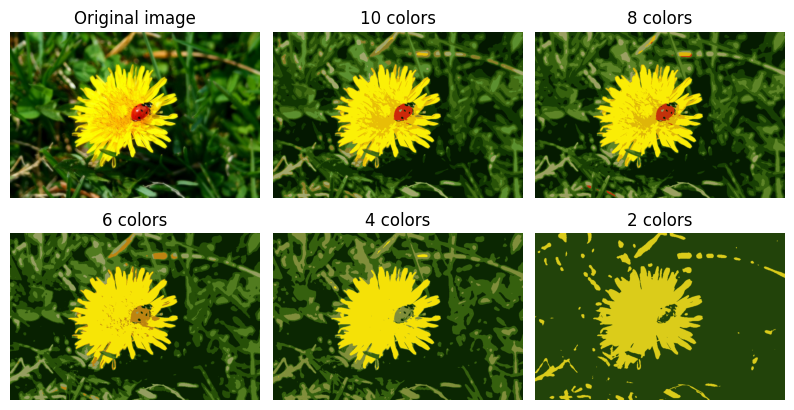

In [11]:
# extra code – this cell generates and saves Figure 9–12

segmented_imgs = [] # creates empty list to store segmented images
n_colors = (10, 8, 6, 4, 2) # defines tuple containing number of colors to use for image segmentation
for n_clusters in n_colors: # iterates over number of colors
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X) # creates kMeans object with n clusters, 10 initialzations, and a random value of 42
    segmented_img = kmeans.cluster_centers_[kmeans.labels_] # assigns each pixel to corresponding cluster center
    segmented_imgs.append(segmented_img.reshape(image.shape)) # reshapes segmenteded image back to original shape and appends with list

plt.figure(figsize=(10, 5)) # creates figure with specified size
plt.subplots_adjust(wspace=0.05, hspace=0.1) # adjusts spacing betweem subplots

plt.subplot(2, 3, 1) # creates subplot in 2x3 grid
plt.imshow(image) # displays image
plt.title("Original image") # sets title of subplots
plt.axis('off') # turns off axis labels

for idx, n_clusters in enumerate(n_colors): # iterates over segemented images and corresponding number of colors
    plt.subplot(2, 3, 2 + idx) # creates a subplot for each segmented images
    plt.imshow(segmented_imgs[idx] / 255) # displays segmented image normalized to range 0-1
    plt.title(f"{n_clusters} colors") # titles the subplot based on the number of colors in the segmentation
    plt.axis('off') # turns off axis labels

plt.show() # displays the plot

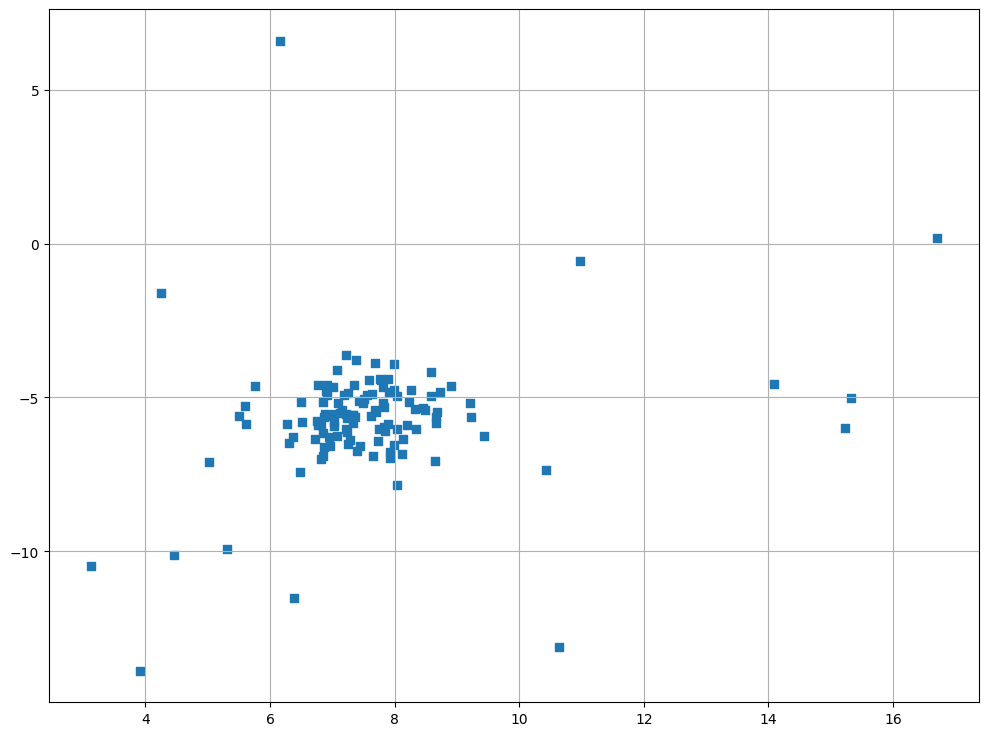

In [11]:
import numpy as np # imports numpy as np
import matplotlib.pyplot as plt # imports matplotlib as plt
from sklearn.datasets import make_blobs # imports make_blobs from sklearn.datasets


X, y_true = make_blobs(n_samples=100, centers=1, cluster_std=0.8, random_state=5) # generates initial dataset with 100 samples, 1 center, etc.

X_append, y_true_append = make_blobs(n_samples=20,centers=1, cluster_std=5,random_state=5) # generate data points with higher std (outliers)

X = np.vstack([X,X_append]) # combines the datasets vertically
y_true = np.hstack([y_true, [1 for _ in y_true_append]]) # combines the datasets horizontally


plt.figure(figsize=(12,9)) # creates a figure for plot with given size
X = X[:, ::-1] # reverses the order of columns
plt.grid(True) # adds a grid to plot
plt.scatter(X[:,0],X[:,1],marker="s"); # creates a scatter plot using square markers

In [12]:
from sklearn.mixture import GaussianMixture # imports GaussianMixture class from sklearn.mixture

gmm = GaussianMixture(n_components=1) # creates a GaussianMixture with 1 component
gmm.fit(X) # fits the model to the data

GaussianMixture()

In [13]:
gmm.converged_ # checks to see if the model converged

True

In [14]:
gmm.n_iter_ # returns the number of iterations taken to converge model

2

In [15]:
gmm.means_, gmm.covariances_, gmm.weights_ # returns the means, covariances, and weights of the model

(array([[ 7.64313937, -5.65216561]]),
 array([[[3.36849845, 0.92780644],
         [0.92780644, 4.37902798]]]),
 array([1.]))

In [16]:
gmm.bic(X) # returns the Bayesian Information Criterion (BIC) of the model

1020.7675316435038

In [17]:
gmm.aic(X) # returns the Akaike Information Criterion (AIC) of the model

1006.8300729295936

In [18]:
scores = gmm.score_samples(X)  # computes the weighted log probabilties for each sample
print(scores[0:5]) # prints the log probabilities of first 5 samples in dataset

[-3.54611177 -3.22356918 -3.25026183 -3.24526915 -3.3393749 ]


In [19]:
thresh = np.quantile(scores, 0.1) # function calculates the 10th percentile of data in the scores array
print(thresh) # prints the value of the 10th percentile value

-5.623547106080151


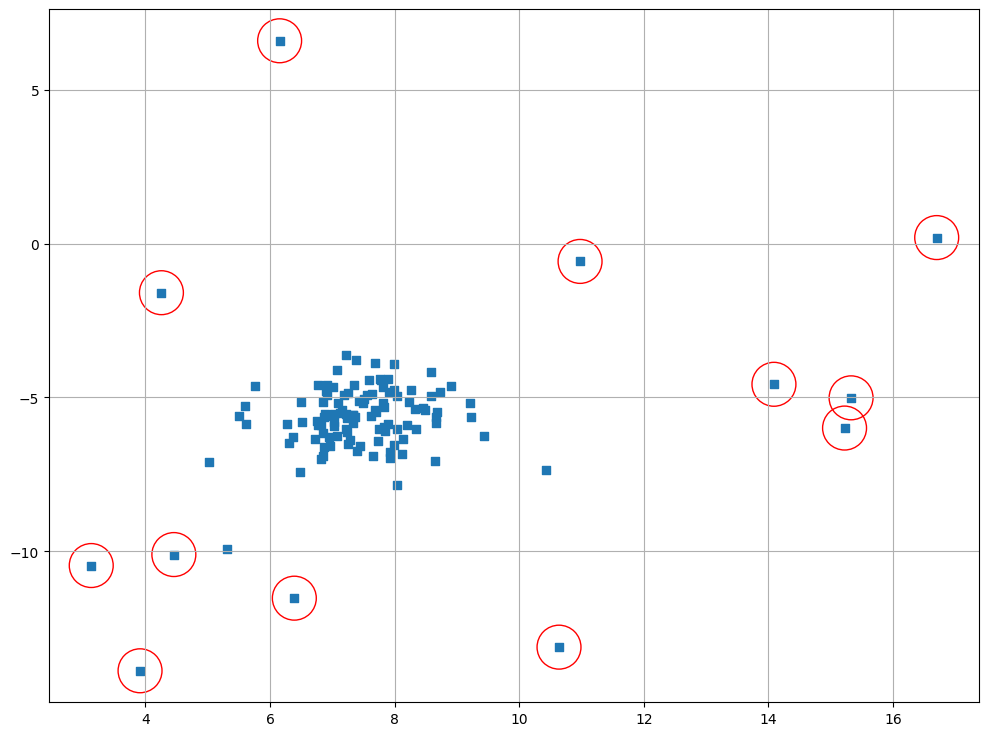

In [20]:
index = np.where(scores <= thresh) # gets indices of data points with scores below threshold

# Circling of anomalies
plt.figure(figsize=(12,9)) # creates a new figure for plot with given size
plt.grid(True) # creates grid lines
plt.scatter(X[:,0],X[:,1],marker="s"); # creates scatter plot of all data points as squares
plt.scatter(X[index,0],X[index,1],marker="o",facecolor="none",edgecolor="r",s=1000); # highlights potential anomalies with large red circles